In [52]:
import rebound
import numpy as np
from random import random, uniform, seed

In [53]:
def acrit(sim): # Holman & Wiegert 99 for the critical semimajor axis around each star
    ps = sim.particles
    mu = ps[1].m/(ps[1].m+ps[0].m)
    return 0.464 - 0.38*mu - 0.631*ps[1].e +0.586*ps[1].e*mu + 0.15*ps[1].e**2 -0.198*ps[1].e**2*mu
def stop(reb_sim, reb_col):
    reb_sim.contents._status = 6
    return 0

In [54]:
def sample(randseed):
    seed(randseed)
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=random(), a=1., e=random())
    return max(acrit(sim), 0)

In [55]:
Nsamples = 1000
acrits = [sample(i) for i in range(Nsamples)]
a = np.array(acrits).mean()
a

0.14930513570140028

In [31]:
sim = rebound.Simulation()
sim.G = 4*np.pi**2
Rmin = 1./215.
sim.add(m=1., r=Rmin)
sim.add(m=1., a=1., e=0.1, r=Rmin)
sim.move_to_com()
ps = sim.particles

print('acrit = {0}'.format(acrit(sim)))
sim.add(a=0.8*acrit(sim), primary=ps[0])
print(ps[2].a)
sim.exit_max_distance= 100.
sim.collision="direct"
sim.collision_resolve = stop

#rebx = reboundx.Extras(sim)
#rebx.add("modify_orbits_forces")
#ps[2].params['tau_a'] = -1000*ps[2].P

acrit = 0.2407100000000001
0.1504114965006919


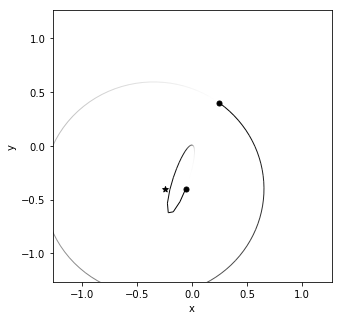

In [36]:
%matplotlib inline
fig = rebound.OrbitPlot(sim)

In [35]:
sim.integrate(1.e4)